## Project: **CarND-Advanced-Lane-Lines** 
***
In this project, .....

 [link](link)

---


## Import Packages

In [124]:
#importing packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Functions

In [125]:
def cal_camera (src_dir,nx,ny):
    """
    function mainly taken from the lesson : CarND-Camera-Calibration-master
    1) prepare arrays to store the values
    2) prepare objpoints in type np.float 32 in the required form
    3) set the directory to load calibration images
    4) iterate images in file and apply grayscale and cv2.findChessboardCorners
    5) if found, return the corners to feed the calibration function
    6) return mtx and dist to undistortion function later
    """

    #Arrays to store
    objpoints = [] #3D points in real world space
    imgpoints = [] #2D points in image plane
    
    # Prepare object points
    objp= np.zeros ((nx*ny,3), np.float32)
    objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinates
    
    #set the directory for the calibration images
    imgs = glob.glob(src_dir)
        
    # look for corners from calibration images
    for idx, fname in enumerate(imgs):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
    
    #Calibrate Camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[1::-1], None, None)
       
    #return mtx and dist for undistort
    return (mtx, dist)
    
def plot_two_imgs (img,undist_img):
    """
    plot the two images side by side and save them in the output_images
    """
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undist_img)
    ax2.set_title('Processed Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    #plt.savefig("output_images/calibration_example")
    
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel_der=np.absolute(abs_sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel=np.uint8(255*abs_sobel_der/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>thresh_min) & (scaled_sobel < thresh_max)]=1
    # 6) Return this mask 
   
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # 1) Convert to grayscale
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    abs_sobelx=np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0))
    abs_sobely=np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1))
    # 3) Calculate the magnitude 
    sobel_magn= np.sqrt(abs_sobelx*abs_sobelx + abs_sobely*abs_sobely )
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel=np.uint8(255*sobel_magn/np.max(sobel_magn))
    # 5) Create a binary mask where mag thresholds are met
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>mag_thresh[0])&(scaled_sobel<mag_thresh[1])]=1
    # 6) Return this mask 
    
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # 1) Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y sepGRAYarately
    sobelx= cv2.Sobel(gray, cv2.CV_64F,1,0)
    sobely= cv2.Sobel(gray, cv2.CV_64F,0,1)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx= np.absolute(sobelx)
    abs_sobely= np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir= np.arctan2(abs_sobely,abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output=np.zeros_like(grad_dir)
    binary_output[(grad_dir >thresh[0]) & (grad_dir< thresh[1])]=1 
    # 6) Return this mask
    
    return binary_output

def hls_S_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H=hls [:,:,0]
    L=hls [:,:,1]
    S=hls [:,:,2]
   
    # 2) Apply a threshold to the S channel
    threshold= (S<=thresh[1]) & (S>thresh[0]) 
    
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(S) # placeholder line
    binary_output [threshold]=1
    return binary_output


def RGB_R_select(img, thresh=(0, 255)):
    # 1) annotate channels
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    # 2) Apply a threshold to the S channel
    threshold= (R<=thresh[1]) & (R>thresh[0]) 
    
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(R) # placeholder line
    binary_output [threshold]=1
    return binary_output

    

## Test Images

In [126]:
import os
#os.listdir("test_images/")
#os.listdir("camera_cal/")

## Pipeline



The pipeline ...

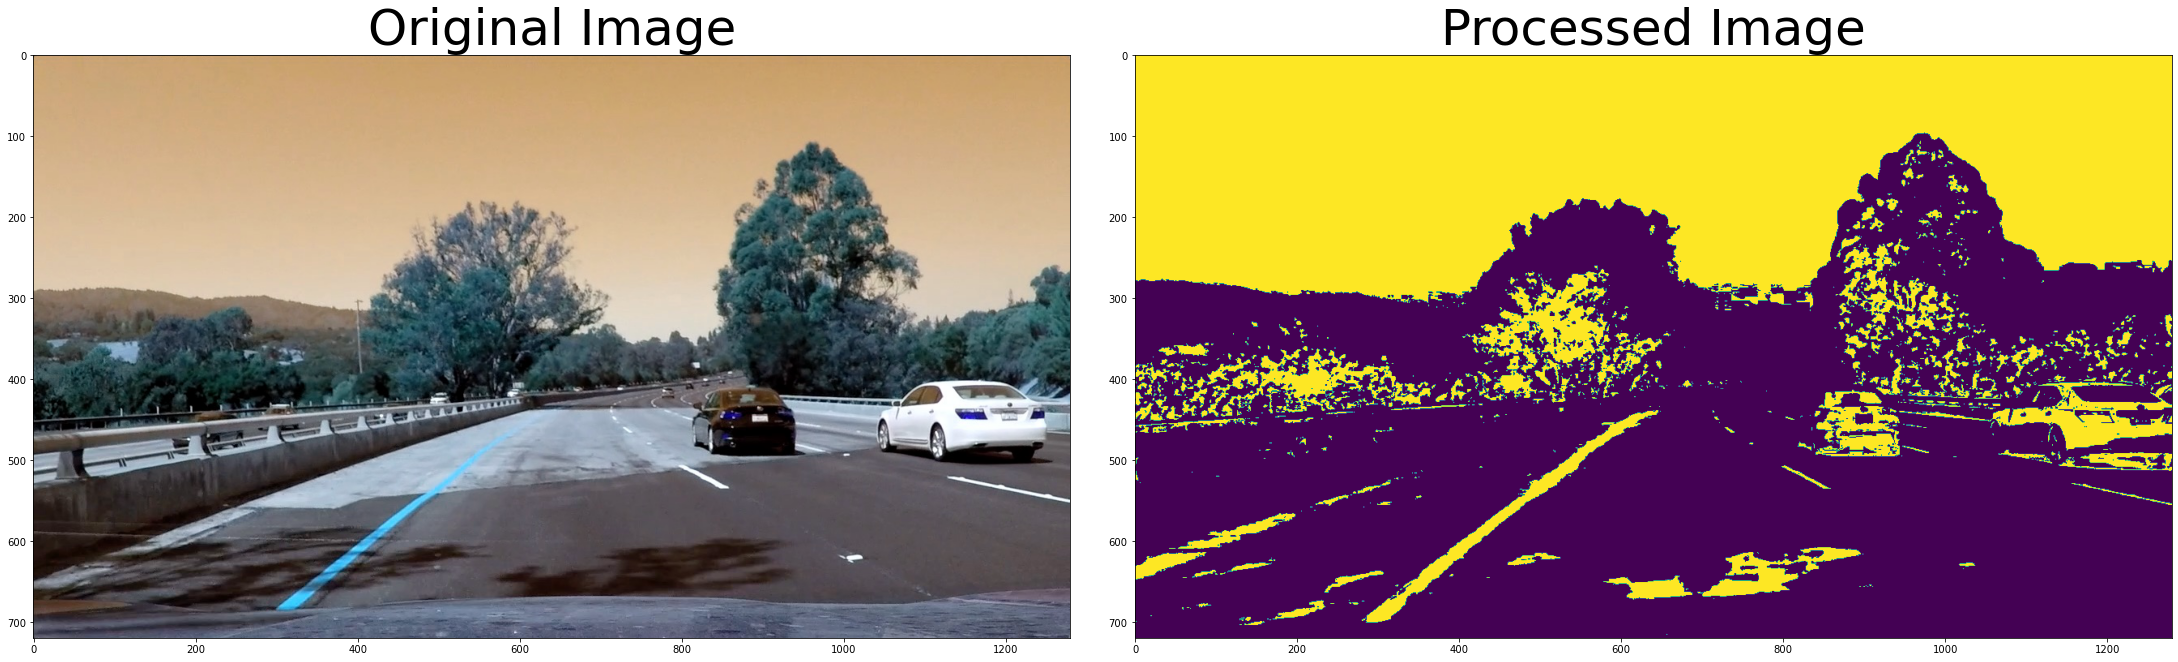

In [127]:
# TODO: Build pipeline 

def pipeline(img):
    
    """
    Initialize
    """

    #Chessboard dimensions
    nx=9
    ny=6
    #set directory for calibration images
    directory='camera_cal/calibration*.jpg'
    
    # Call the function calibration
    mtx, dist= cal_camera(directory,nx,ny)
    
    # Undistort image example for the project critera
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    
    hls_binary = hls_S_select(undist_img, thresh=(90, 255))
    
    #RGB_binary = RGB_R_select(undist_img, thresh=(190, 255))
    #gradx = abs_sobel_thresh(img, orient='x',  thresh_min=70, thresh_max=225)
    #grady = abs_sobel_thresh(img, orient='y', thresh_min=90, thresh_max=255)
    #mag_binary = mag_thresh(img, mag_thresh=(90, 255))
    #dir_binary = dir_threshold(img, thresh=(0.7, 1.1)) 
    #combined = np.zeros_like(hls_binary)
    #combined[(hls_binary == 1)  | ((gradx == 1) )] = 1
    #return img_output
    
    
    return hls_binary

img=cv2.imread('test_images/test4.jpg')
output_img= pipeline(img)

#plot the images
plot_two_imgs (img,output_img)

    


    

## Test on Videos

...

In [128]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [129]:
def process_image(image):
    result=pipeline(image)
    return result

# 1) Project Video

In [130]:
"""
white_output = 'test_videos_output/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)
"""

'\nwhite_output = \'test_videos_output/project_video.mp4\'\nclip1 = VideoFileClip("project_video.mp4")\nwhite_clip = clip1.fl_image(process_image)\n%time white_clip.write_videofile(white_output, audio=False)\n'

In [131]:
#HTML("""
#<video width="960" height="540" controls>
#  <source src="{0}">
#</video>
#""".format(white_output))

# 2) Challenge video

In [132]:
"""
challenge_output = 'challenge_video.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)
"""

"\nchallenge_output = 'challenge_video.mp4'\nclip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')\nyellow_clip = clip2.fl_image(process_image)\n%time yellow_clip.write_videofile(yellow_output, audio=False)\n"

In [133]:
#HTML("""
#<video width="960" height="540" controls>
#  <source src="{0}">
#</video>
#""".format(yellow_output))

# 3) Harder challenge video

In [134]:
"""
harder_challenge_output = 'test_videos_output/harder_challenge_video.mp4'
clip3 = VideoFileClip('harder_challenge_video.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)
"""

"\nharder_challenge_output = 'test_videos_output/harder_challenge_video.mp4'\nclip3 = VideoFileClip('harder_challenge_video.mp4')\nchallenge_clip = clip3.fl_image(process_image)\n%time challenge_clip.write_videofile(challenge_output, audio=False)\n"

In [135]:
#HTML("""
#<video width="960" height="540" controls>
#  <source src="{0}">
#</video>
#""".format(challenge_output))